# Predicting Car Prices

In [25]:
import pandas as pd
import numpy as np

### Read in the dataset

In [26]:
cars = pd.read_csv("imports-85.data")
cars

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Column names are not appropriately named. First find out which columns are numeric and which column corresponds to the car's price. Also rename the columns and read in the dataset again but with the new column names.

In [27]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=cols)
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Clean the data

There are missing values as indicated by the '?' in the cells, thus those values must be replaced as NaN. This is key as some of the missing values occur in numeric columns that are classified as object data-types by mistake.

In [28]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [29]:
cars = cars.replace('?',np.nan)
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Check the number of missing values for all columns and for all the rows. The normalized-losses column has the most missing values at 41!

In [30]:
cars.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [31]:
for row,count in enumerate(cars.isna().sum(axis=1)):
    print("row # {}, count of missing values = {}".format(row,count))

row # 0, count of missing values = 1
row # 1, count of missing values = 1
row # 2, count of missing values = 1
row # 3, count of missing values = 0
row # 4, count of missing values = 0
row # 5, count of missing values = 1
row # 6, count of missing values = 0
row # 7, count of missing values = 1
row # 8, count of missing values = 0
row # 9, count of missing values = 2
row # 10, count of missing values = 0
row # 11, count of missing values = 0
row # 12, count of missing values = 0
row # 13, count of missing values = 0
row # 14, count of missing values = 1
row # 15, count of missing values = 1
row # 16, count of missing values = 1
row # 17, count of missing values = 1
row # 18, count of missing values = 0
row # 19, count of missing values = 0
row # 20, count of missing values = 0
row # 21, count of missing values = 0
row # 22, count of missing values = 0
row # 23, count of missing values = 0
row # 24, count of missing values = 0
row # 25, count of missing values = 0
row # 26, count of mis

In [32]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [33]:
numeric_cols = ['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg','price']
numeric_cars = cars[numeric_cols].copy()
numeric_cars = numeric_cars.astype('float')
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


Drop the rows with missing price information

In [34]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,NaN,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,NaN,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [35]:
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Fill in missing values for each column using that column's mean value.

In [36]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [37]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Normalize the numeric columns' data.

In [38]:
price_col = numeric_cars['price']
norm_numeric_cars = (numeric_cars - numeric_cars.mean())/(numeric_cars.std())
norm_numeric_cars['price'] = price_col
norm_numeric_cars.shape

(201, 15)

## Build K-Nearest Neighbor Model, Test the KNN Model, and Plot the Results

In [137]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(train, target, df, k, predict=False):
    last_train_row = int(len(df)*.8)
    train_df = df.iloc[:last_train_row]
    test_df = df.iloc[last_train_row:]
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
    if isinstance(train,str): #univariate case
        knn.fit(train_df[[train]],train_df[[target]])
        predictions = knn.predict(test_df[[train]])
    else: #multivariate case
        knn.fit(train_df[train],train_df[[target]])
        predictions = knn.predict(test_df[train])
    mse = mean_squared_error(test_df[[target]],predictions)
    if predict == True: return test_df, predictions
    else: return np.sqrt(mse)

Let's see which numeric column results in the univariate knn model with the smallest RMSE value assuming k=5 by default.

In [138]:
columns = norm_numeric_cars.columns.tolist()
columns.remove('price')
rmse = []
k = 5
for col in columns:
    rmse.append(knn_train_test(col, 'price', norm_numeric_cars, k))
cols_rmse = {'Column': columns, 'RMSE': rmse}
cols_rmse_df = pd.DataFrame(cols_rmse)
cols_rmse_df.sort_values('RMSE')

,Column,RMSE
5,curb-weight,2227.943813
13,highway-mpg,3034.343050
6,engine-size,3828.997194
12,city-mpg,3841.663247
3,width,4299.404804
10,horsepower,4357.717481
9,compression-rate,5019.928551
1,wheel-base,6092.796157
4,height,6177.133622
2,length,6999.976343


For each column, a univariate knn model was built for values of k and then visualized how the RMSE trends for each k value.

In [139]:
rmse_data = {}
k_values = np.arange(1,20)
rmse_data['k'] = k_values
for col in columns:
    rmse = []
    for k in k_values:
        rmse.append(knn_train_test(col, 'price', norm_numeric_cars, k))
    rmse_data[col] = rmse
rmse_data_df = pd.DataFrame(rmse_data)
rmse_data_df

,k,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,12382.009837,5952.961067,8997.171772,8803.153648,8135.071592,4150.268070,5691.738628,11525.926210,7171.839564,9333.063658,5561.944791,14024.452013,4150.436398,4564.211205
1,2,9958.440026,6724.074992,6332.836490,6849.030591,8942.005255,2379.563949,5047.410184,7608.256297,7888.095544,5025.639320,5565.402275,13765.432354,3801.861433,4003.256655
2,3,11911.643214,6068.051046,6393.292872,4591.390043,8394.225596,2370.531150,5133.178798,8869.919430,7689.553318,4745.502220,4741.185078,11261.832098,3580.027200,4295.198000
3,4,11067.083975,5172.495372,6840.641590,4459.359358,7544.814889,2194.020864,4250.765891,7385.943779,8841.315962,4671.096221,4244.317122,8930.611757,3659.942496,3409.701089
4,5,9159.312262,6092.796157,6999.976343,4299.404804,6177.133622,2227.943813,3828.997194,7264.692671,7983.440442,5019.928551,4357.717481,7374.522849,3841.663247,3034.343050
5,6,7975.319346,5559.163327,6827.719033,3819.401496,6418.343592,2368.475770,3639.270934,7443.504875,7171.508266,5511.887800,4771.190704,6500.646238,3892.292248,2772.697783
6,7,7344.473785,5914.963442,6309.851162,3513.035508,6540.415796,2576.435038,3521.711258,7836.133546,6341.425528,5358.063351,4579.394739,6145.573674,3813.162995,2724.258359
7,8,6792.508143,5860.382026,5517.848675,3336.129422,5802.807371,2520.599035,3485.425031,6990.819794,5919.553421,5460.925154,4553.229200,5874.970944,3824.923790,2879.038717
8,9,6257.043115,5520.269734,4997.282720,3157.965935,5272.222890,2613.077457,3372.523905,6493.142304,6098.888039,5519.289467,4367.819662,5833.305993,3815.114890,2692.689887
9,10,6009.048965,5263.033208,4648.617851,3010.012919,5134.782454,2725.510252,3365.815313,5959.812385,6681.268160,5278.093857,4251.669740,5859.275471,3806.731871,2647.400909


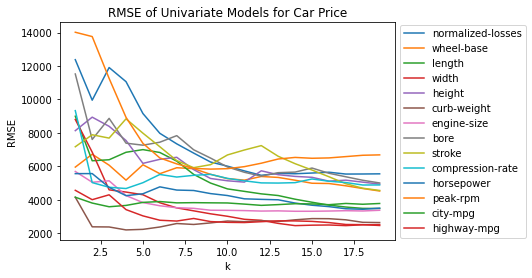

<Figure size 2160x2160 with 0 Axes>

In [140]:
import matplotlib.pyplot as plt
def plot_k_vs_rmse(df, x_var, y_var, title):
    df.plot.line(x=x_var, y=y_var)
    plt.xlabel('k')
    plt.ylabel('RMSE')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title(title)
    plt.figure(figsize=(30,30))
    plt.show()
plot_k_vs_rmse(rmse_data_df, 'k', columns, "RMSE of Univariate Models for Car Price")

Create multivariate knn models using the best set of features. This was done for n best features with n in range [2,5] and with k in range [1,25]. Then the results were plotted.

In [141]:
def get_best_features(df, n, k):
    df_k = df.iloc[k-1].sort_values()
    del(df_k['k'])
    return df_k.keys().tolist()[:n]

n = 5
k = 5
bestn = get_best_features(rmse_data_df, n, k)
bestn

['curb-weight', 'highway-mpg', 'engine-size', 'city-mpg', 'width']

In [142]:
knn_topn_data = {}
k_values = np.arange(1,26)
knn_topn_data['k'] = k_values
for num in np.arange(2,7):
    bestn = get_best_features(rmse_data_df, num, 5)
    rmse = []
    for k in k_values:
        rmse.append(knn_train_test(bestn, 'price', norm_numeric_cars, k))
    knn_topn_data['RMSEs for best {} features'.format(num)] = rmse
knn_topn_data_df = pd.DataFrame(knn_topn_data)
knn_topn_data_df

,k,RMSEs for best 2 features,RMSEs for best 3 features,RMSEs for best 4 features,RMSEs for best 5 features,RMSEs for best 6 features
0,1,4338.452247,4407.406156,4140.855962,3099.540875,2501.072775
1,2,3264.863041,2856.768209,2671.184705,2478.681749,2651.715255
2,3,3436.747319,3152.402039,2549.737483,2356.488689,2700.536968
3,4,2988.080714,3043.102532,2406.615842,2324.984879,2705.399286
4,5,2798.796569,2905.936293,2285.067369,2371.327267,2451.101736
5,6,2946.150500,2707.443647,2146.160643,2359.903827,2492.486749
6,7,2739.437202,2761.451945,2351.555800,2265.923121,2461.305791
7,8,2662.950678,2839.401373,2287.944107,2238.179011,2439.902129
8,9,2623.617053,2964.522961,2316.110150,2268.296041,2463.037860
9,10,2548.767650,2953.709353,2282.114138,2154.368300,2573.848995


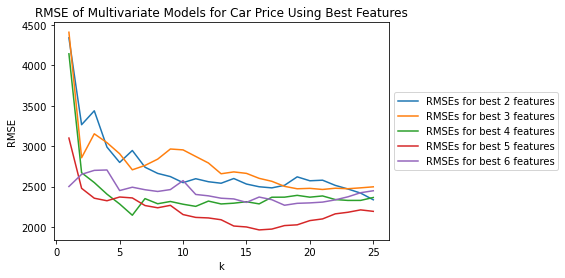

<Figure size 2160x2160 with 0 Axes>

In [143]:
columns = knn_topn_data_df.columns.tolist()
columns.remove('k')
plot_k_vs_rmse(knn_topn_data_df, 'k', columns, "RMSE of Multivariate Models for Car Price Using Best Features")

Based on the above plot, the five best features of curb-weight, highway-mpg, engine-size, city-mpg, and width with k=16 is sufficient for minimizing the RMSE in order to achieve the best possible predictions of car prices.

In [148]:
bestn = get_best_features(rmse_data_df, 5, 5)
test_df, predictions = knn_train_test(bestn, 'price', norm_numeric_cars, 16, predict=True)
test_df['predicted price'] = predictions
test_df['percent error'] = 100 * (test_df['predicted price'] - test_df['price'])/test_df['price']
test_df

C:\Users\arnav\Anaconda3\envs\dsaiml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\arnav\Anaconda3\envs\dsaiml\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price,predicted price,percent error
164,1.437668,-0.708334,-0.446431,-0.898920,-0.476614,-0.679816,-0.695014,-0.524899,-0.717941,-0.290709,-0.893790,-0.664253,0.594857,0.486186,8238.0,7461.7500,-9.422797
165,1.437668,-0.708334,-0.446431,-0.898920,-0.476614,-0.561895,-0.695014,-0.338382,-0.559737,-0.190833,0.230239,3.100546,0.127801,-0.247473,9298.0,9736.1875,4.712707
166,1.437668,-0.708334,-0.446431,-0.898920,-0.476614,-0.494236,-0.695014,-0.338382,-0.559737,-0.190833,0.230239,3.100546,0.127801,-0.247473,9538.0,9970.7500,4.537115
167,0.375044,-0.065445,0.162228,-0.137549,-0.721730,-0.030286,0.460309,1.079149,0.769177,-0.215802,0.337289,-0.664253,-0.183569,-0.100741,8449.0,10783.5000,27.630489
168,0.375044,-0.065445,0.162228,-0.137549,-0.721730,-0.038018,0.460309,1.079149,0.769177,-0.215802,0.337289,-0.664253,-0.183569,-0.100741,9639.0,10783.5000,11.873638
169,0.375044,-0.065445,0.162228,-0.137549,-0.721730,-0.009021,0.460309,1.079149,0.769177,-0.215802,0.337289,-0.664253,-0.183569,-0.100741,9989.0,10783.5000,7.953749
170,0.375044,-0.065445,0.162228,-0.137549,-0.721730,0.238419,0.460309,1.079149,0.769177,-0.215802,0.337289,-0.664253,-0.183569,-0.100741,11199.0,12370.4375,10.460197
171,0.375044,-0.065445,0.162228,-0.137549,-0.721730,0.306078,0.460309,1.079149,0.769177,-0.215802,0.337289,-0.664253,-0.183569,-0.100741,11549.0,12370.4375,7.112629
172,0.375044,-0.065445,0.162228,-0.137549,-0.313204,0.810624,0.460309,1.079149,0.769177,-0.215802,0.337289,-0.664253,-0.183569,-0.100741,17669.0,14823.6875,-16.103416
173,-1.781459,0.593928,0.113536,0.290723,0.462997,-0.443975,-0.117352,-0.077258,0.895740,-0.365616,-0.305013,-1.919186,0.594857,0.486186,8948.0,9049.3125,1.132236


## Use K-fold Cross-Validation to Estimate RMSE of Car Price

Here's the algorithm from k-fold cross validation:

1. splitting the full dataset into k equal length partitions.

2. selecting k-1 partitions as the training set and selecting the remaining partition as the test set.

3. training the model on the training set using the trained model to predict labels on the test fold.

4. computing the test fold's error metric.

5. repeating all of the above steps k-1 times, until each partition has been used as the test set for an iteration.

6. calculating the mean of the k error values.

As the number of folds increases, the number of observations in each fold decreases and the variance of the fold-by-fold errors increases.

In [155]:
norm_numeric_cars.loc[norm_numeric_cars.index[0:40], "fold"] = 1
norm_numeric_cars.loc[norm_numeric_cars.index[40:80], "fold"] = 2
norm_numeric_cars.loc[norm_numeric_cars.index[80:120], "fold"] = 3
norm_numeric_cars.loc[norm_numeric_cars.index[120:160], "fold"] = 4
norm_numeric_cars.loc[norm_numeric_cars.index[160:], "fold"] = 5
norm_numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price,fold
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0,1.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0,1.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0,1.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0,1.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.843849,1.698379,1.184775,1.432780,0.708112,0.766162,0.339963,1.676004,-0.338251,-0.165864,0.283764,0.590680,-0.339254,-0.394205,16845.0,5.0
201,-0.843849,1.698379,1.184775,1.385194,0.708112,0.953676,0.339963,1.676004,-0.338251,-0.365616,1.514843,0.381525,-0.961995,-0.834401,19045.0,5.0
202,-0.843849,1.698379,1.184775,1.432780,0.708112,0.882150,1.110178,0.929935,-1.224194,-0.340647,0.819016,0.799836,-1.117680,-1.127865,21485.0,5.0
203,-0.843849,1.698379,1.184775,1.432780,0.708112,1.278441,0.436240,-1.196361,0.452769,3.204952,0.069663,-0.664253,0.127801,-0.540937,22470.0,5.0


In [157]:
def kfold_cross_validate(df,folds):
    rmse_values = []
    for fold in folds:
        train_set = df[df['fold'] != fold].copy()
        test_set = df[df['fold'] == fold].copy()
        
        features = df.columns.tolist()
        features.remove('price')
        model = KNeighborsRegressor() # n_neighbors=5, algorithm='auto'
        
        model.fit(train_set[features],train_set['price'])
        test_set['predicted_price'] = model.predict(test_set[features])
        rmse_values.append(np.sqrt(mean_squared_error(test_set['price'],test_set['predicted_price'])))
    return rmse_values
fold_ids = [1,2,3,4,5]
rmse_values = kfold_cross_validate(norm_numeric_cars,fold_ids)
avg_rmse = np.mean(rmse_values)
print(avg_rmse)
print(rmse_values)

4857.871107297977
[5980.557550429558, 6454.505623593492, 3845.2401347640175, 5477.756625572188, 2531.2956021306272]


In [159]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(5, shuffle=True, random_state=1)
features = norm_numeric_cars.columns.tolist()
features.remove('price')
knn = KNeighborsRegressor() # n_neighbors=5, algorithm='auto'

vals = cross_val_score(knn,norm_numeric_cars[features],norm_numeric_cars['price'], scoring="neg_mean_squared_error", cv=kf)

for i in range(len(vals)):
    vals[i] = np.sqrt(abs(vals[i]))
    
avg_rmse = np.mean(vals)

avg_rmse

3237.5096214227806